# Using Julia for Economic Analysis

June 2021, Takeki Sunakawa

# Computer programming in Economics

- Necessary?

- Yes, especially for Macro (also for Metrics, IO, etc.)

- People have used Matlab, R, and Fortran.

- Recently other alternatives, such as Python and Julia, are available for economists.

# Necessity for Julia

<!-- - ... partly due to COVID-19. -->
<!--- Hitotsubashi University has an enterprise license for Matlab, but it cannot be used remotely.-->

- __Julia__ is free, and remotely accessible.

- My talk below is based on lecture notes by John Stachurski, one of the founders of QuantEcon [https://quantecon.org/](https://quantecon.org/).

# Scientific programming environments

- Low-level languages: More programming, less running time
  - C, C++
  - Fortran

- High-level languages: Less programming, more running time
  - MATLAB
  - R
  - Python
  - Julia
  - etc.

- In Macro, MATLAB is popular. If you need speed, Fortran is alternative.

# What is Julia?

- A high-level, general purpose programming language

- Used extensively by tech firms, finance industy, government, and academia. Also became very popular in Data Science (See [https://pypl.github.io/PYPL.html](https://pypl.github.io/PYPL.html))

- Free and open source

- A lot of **packages** for particular purposes

# Packages

- We use the following packages for Julia <!--(by typing e.g. `import numpy`).-->

- Packages can be installed by `import Pkg; Pkgs.add("$name")` or press `]` and `add $name`

- Examples of packages:
    - `Printf` format output (c.f., sprintf in MATLAB)

    - `Random` pseudo random number generators

    - `Statistics` calculate mean, standard deviation, etc.
    
    - `Plots` 2D and 3D figures
    
    - ... and more

Example: Mean and std. dev. of an array

In [83]:
using Printf
using Random
using Statistics

a = randn(100000000) # std. normal
println(a[1:5])
# print(np.shape(a))
println(mean(a))
println(std(a))  
println(@sprintf("The 1234th element of a is %1.4f",a[1234]))

[0.7863314042452206, -0.09143007851376717, 0.054753459116163396, 0.6634434918111602, -2.0162511454644703]
1.619341661395887e-5
0.9999476168358677
The 1234th element of a is 1.8105


# Why Julia?

1. Open source (free!)

2. General purpose

3. Easy to use, well designed

4. Remotely accessible

# Interacting with Julia

We will interact with Julia using Jupyter Notebook
- A browser-based front end to Python, Julia, R, etc.

- Stores output as well as input

- Allows for rich text, graphics, etc.

- Easy to run remotely in cloud (Google Colab, Azure Notebook)

This slide deck is also based on Jupyter Notebook!

# Julia 101

- If you are already familiar with Matlab (or Python), just look at https://cheatsheets.quantecon.org/.

## Number manipulation

- `+`: addition, `-`: substruction, `*`: multiplication, `/`: division
- `println` shows the results with starting a new line.

In [1]:
println(1+2)
println(1-2)
println(1*2)
println(1/2)

3
-1
2
0.5


## Variables

- `=` for substitution

In [2]:
a = 1.0
b = 2.0
a/b

0.5

## Arrays

- Arrays can be made by `[]`. Commas are used to add elements.
<!-- - Arrays are handled by NumPy package. Type `import numpy as np` prior to use. `np` is called alias. -->

- Each NumPy function can be used with `np`. 
  - For example, `np.array([1,2])`makes a $(2\times1)$ vector $[1,2]'$.
  - `np.shape` returns the shape of the array.

In [1]:
# An array is made by
b = [1,2]
println(b)
println(size(b))

[1, 2]
(2,)


- The index for a n-size array starts from 1 to n (not from 0 to n-1).
<!-- Arrays with size n are column vectors. Row vectors are (1xn) matrices.-->

In [7]:
# index in n-size array starts from 1 to n
println(b[1])
println(b[2])
println(b[0])

1
2


LoadError: BoundsError: attempt to access 2-element Vector{Int64} at index [0]

- `collect(range(i,stop=j,step=k))` returns a vector start from i to j with increment size k.


- `collect(LinRange(1,10,10))` returns the same vector as what `collect(range(1.0,stop=10.0,10.0))` returns (with some rounding errors) 

In [85]:
b = collect(range(1.0,stop=10.0,step=1.0)) # 1:10 in matlab
println(b)

b = collect(range(1.0,stop=9.0,step=2.0)) # 1:2:9 in matlab
println(b)

# b = collect(LinRange(1,10,10))
# println(b)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[1.0, 3.0, 5.0, 7.0, 9.0]


- Broadcast: element-by-element manipulation by `.`.

In [87]:
# broadcast
println(b)
buf = b.^2
println(buf)

[1.0, 3.0, 5.0, 7.0, 9.0]
[1.0, 9.0, 25.0, 49.0, 81.0]


# Vectors and matrices

- Subsets of arrays.
- `reshape(b,n,m)` reshapes an array `b`.

In [47]:
# array ((2x1) col vector )
b = [1,2]
# b = [2;1]
println(size(b))

# (2x1) col vector
colb = reshape(b,2,1)
println(size(colb))

# (1x2) row vector
# rowb = reshape(b,1,2)
rowb = [1 2]
println(size(rowb))

# matrix
A = [1 0; 2 3]
println(A)
println(size(A))

(2,)
(2, 1)
(1, 2)
[1 0; 2 3]
(2, 2)


- `*` is also used for matrix multiplication.

In [46]:
# mutiplication
A = [1 0; 2 3] # (2x2) matrix
println(A)
b = reshape([1,2],2,1)         # 2-element array is (2x1) column vector
println(b)

println(A*b)                  # (2x2) times (2x1)
println(size(A*b))

[1 0; 2 3]
[1; 2]
[1; 8]
(2, 1)


- Slicing arrays: `b[i:j]` slices elements of b from i to j.


- Can be applied to matrices (or arrays with higher dimensions)


In [48]:
b = collect(range(1.0,stop=10.0,step=1.0)) # 1:10 in Matlab
println(b)
println(b[1:2])         # b(1:2) in Matlab

A = [1 0; 2 3; 4 5]
println(A)
println(A[1:2,:])       # A(1:2,:) in Matlab 

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
[1.0, 2.0]
[1 0; 2 3; 4 5]
[1 0; 2 3]


- Other useful commands: `zeros`, `transpose`, `inv`, etc.

In [55]:
# zeros
println(zeros(2))
println(zeros((2,2)))

# identity
println([1 0; 0 1])

# transpose
A = [1 0; 2 3] # (2x2) matrix
trA = transpose(A)
# trA = A'
println(trA)

# inverse
invA = inv(A)
println(invA)

[0.0, 0.0]
[0.0 0.0; 0.0 0.0]
[1 0; 0 1]
[1 2; 0 3]
[1.0 0.0; -0.6666666666666666 0.3333333333333333]


In [ ]:
# An array is made by
b = np.array([1,2])
print(b)

# which is different from row vector (1x2)
rowb = np.array([1,2]).reshape(1,2)
print(np.shape(rowb))

# NOTE: transposing an array is ...
trb = b.T # still array
print(np.shape(trb))

trrowb = rowb.T # transposing a row vector makes a column vector
print(np.shape(trrowb))


## Loops
### For loops:

- A code block that iterates a procedure for a certain number of times.

- The following code calculates 0+1+2+3+4=10.

- The sum is equal to 0+0=0, 0+1=1, 1+2=3, 3+3=6, 6+4=10 in each loop.

In [56]:
sum = 0 # initial value
for i in 1:5 # i=0,1,2,3,4
    sum = sum + i        # add i to the previous sum
    println(sum)
end
println(sum)

1
3
6
10
15
15


- Code blocks are preceded with colon `:` and delimited by indentations (= __4 spaces__).

- NOTE: Tabs and spaces are different.

### While loops: 

- A code block that iterates a procedure until a certain conditon is met.

- The following code, again, calculates 0+1+2+3+4=10.

In [57]:
sum = 0 # initial value of sum
i = 0   # initial value of i
while i<5 # i=0,1,2,3,4
    sum = sum + i # add i to the previous sum
    println([i,sum])
    i = i + 1 # i is increased here
end
println(sum)

[0, 0]
[1, 1]
[2, 3]
[3, 6]
[4, 10]
10


## If clause

- If the condition is true, we execute a certain procedure. Otherwise, we do nothing or execute another procedure.

In [62]:
a = 3; b = 4;
if (a<b)
    println("a is greater than b.")
else
    println("b is greater than or equal to a.")
end

a is greater than b.


# Displaying results

- `println` shows the results.

- `@sprintf` with a certain format can be used to substitute numbers into strings (like sprintf in Matlab).
  - For example, `%1.4f` prints a number with the float type.
  - You need to install `Printf` package. Need to load the package by `using Printf`.

In [63]:
using Printf

a = [1,2]
println(a)

x = 1.5
buf = @sprintf("x is equal to %1.4f",x) 
print(buf)

[1, 2]
x is equal to 1.5000

# Figures

- `Plot` package is used to plot figures. Need to load the package by `using Plot`.
  - A format for line and dots can be specified.

In [2]:
using Plots

# x = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
x = collect(range(-5.0,stop=5.0,step=1.0)) 
y = x.^2

plot(x,y,title="x^2",linestyle=:dash,markershape=:circle,size=(3000,2000))

LoadError: ArgumentError: Package Plots not found in current path:
- Run `import Pkg; Pkg.add("Plots")` to install the Plots package.


## Types and Lists

- Types: a data property for variables (objects), such as `int`, `float`, `str`, `bool`, etc.

- Lists: a data structure to group (any) variables/objects

- Index for a N-size list starts from 0 to N-1.

NOTE: A NumPy array can group numbers only and has its own type `numpy.ndarray`.

In [ ]:
x = [10.0, 'foo', False] # 0: float, 1: str, 2: bool
print(type(x[0]))
print(type(x))

y = np.zeros(3) # A numpy array accepts numbers (float64) only
y[0] = 10
# y[1] = 'foo'  # error
print(type(y[0]))
print(type(y))

# Exercise

- Suppose we want to simulate $\varepsilon_t \sim N(0,\sigma^2)$ for $t=1,2,...,T$, and plot the sequence of $\{\varepsilon_t\}$.

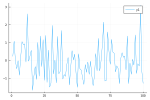

In [3]:
using Random
using Plots

T = 100
epsilon_vec = randn(T)
    
plot(epsilon_vec)

- More exercises are found at [https://python-programming.quantecon.org/python_by_example.html](https://python-programming.quantecon.org/python_by_example.html).